In [123]:
import xarray as xa
import rioxarray as rxa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from glob import glob
from os.path import join
import scipy
from scipy.signal import convolve2d
from scipy.stats import mannwhitneyu, linregress

In [98]:
ds = xa.open_dataset('/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/ds-lidar-us6.nc')
# ds = ds.drop('spatial_ref')

In [6]:
cor_52_fp = '/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/uavsar/lowman_05208_21015-009_21017-019_0007d_s01_L090_01_int_grd/lowman_05208_21015-009_21017-019_0007d_s01_L090VV_01.cor.grd.tiff'

In [8]:
uav_52_cor = rxa.open_rasterio(cor_52_fp)

In [19]:
ds['spatial_ref'].attrs['crs_wkt']

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [30]:
uav_low = uav_52_cor.rio.reproject('EPSG:4326', shape = (5000,5000))

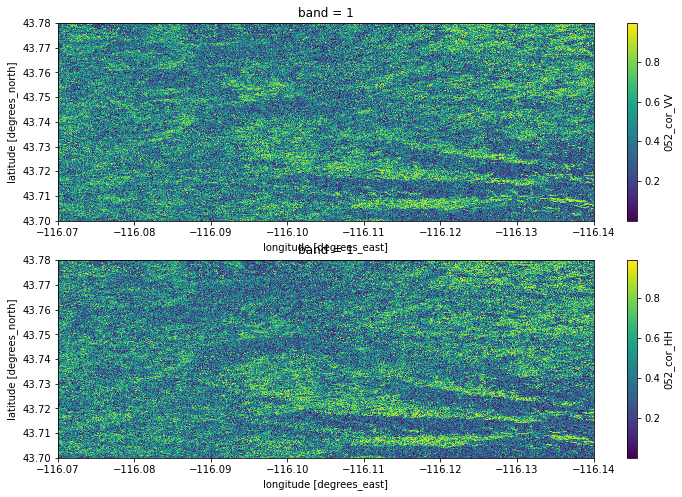

In [33]:
f, axes = plt.subplots(2, figsize = (12,8))
ds['052_cor_VV'].plot(ax = axes[0])
ds['052_cor_HH'].plot(ax = axes[1])
for ax in axes:
    ax.set_xlim(-116.07,-116.14)
    ax.set_ylim(43.7, 43.78)

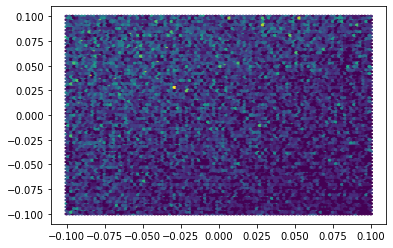

In [91]:
plt.hexbin(x = ds['052_unw_VV'].values, y = ds['052_unw_HH'].values)

In [105]:
ds = ds.rio.write_crs('EPSG:4326')

In [136]:
ds['232_unw_VV'].values[ds['232_cor_VV'].values < 0.7] = np.nan
ds['232_unw_HH'].values[ds['232_cor_HH'].values < 0.7] = np.nan
unw_232_HH_inter = ds['232_unw_HH'].rio.interpolate_na()
unw_232_VV_inter = ds['232_unw_VV'].rio.interpolate_na()

In [150]:
ds = ds.rio.write_crs('EPSG:4326')

In [151]:
ds['232_cor_VV'].rio.reproject(dst_crs = 'EPSG:4326', shape = (int(ds['232_cor_VV'][0].shape[0]/2), int(ds['232_cor_VV'][0].shape[1]/2)), method = 'bilinear')

CPLE_AppDefinedError: Unable to compute a BILINEAR based transformation between pixel/line and georeferenced coordinates for <VRTDataset rasterYSize="1872" rasterXSize="1519"><VRTRasterBand /><SRS>GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]</SRS><GeoTransform>-116.14562424,5.5559999999988524e-05,0.0,43.798336920000004,0.0,-5.556000000000293e-05</GeoTransform></VRTDataset>.

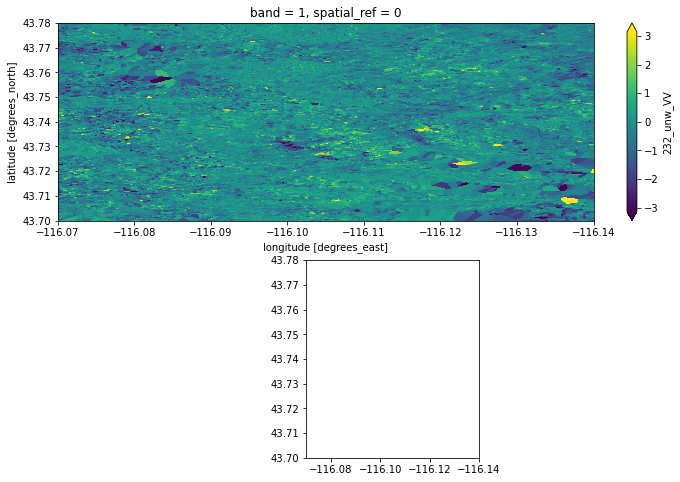

In [134]:
f, axes = plt.subplots(2, figsize = (12,8))
xa.plot.imshow(unw_232_VV_inter[0], vmin = -np.pi, vmax = np.pi, interpolation = 'none', ax = axes[0])
xa.plot.imshow(unw_232_VV_inter[0], vmin = -np.pi, vmax = np.pi, interpolation = 'none', ax = axes[0])

for ax in axes:
    ax.set_xlim(-116.07,-116.14)
    ax.set_ylim(43.7, 43.78)